# CUSTOM ACTIVATION FUNCTION

In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

we define a new PyTorch module called “Softplus” that inherits from the nn.Module class. The forward method defines how the module should behave when given an input tensor x.

In [41]:
class Softplus(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x, beta=1):
        return 1/beta * torch.log(1 + torch.exp(beta * x))

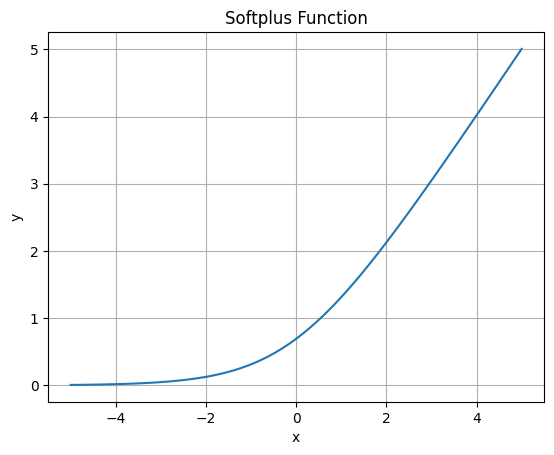

In [42]:
import matplotlib.pyplot as plt

# create custom dataset
x = torch.linspace(-5, 5, 100)

k = Softplus()
y = k(x)

# plot the softplus function graph
plt.plot(x, y)
plt.grid(True)
plt.title('Softplus Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The process may vary depending on the specific function being defined, and it may require additional considerations such as ensuring the function is differentiable for use in backpropagation

In [43]:
class sigmoid_custom(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
     return 1/(1+torch.exp(-x))

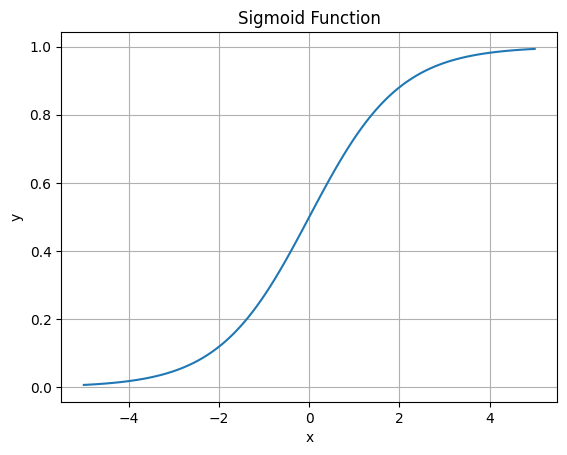

In [44]:
output = sigmoid_custom()(x)
# Plot the sigmoid function
plt.plot(x, output)
plt.grid(True)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# TEST SU DISCRETIZZAZIONE

In [45]:
def DNA_generator(dna_length,v_min,v_max):
    DNA=np.random.uniform(v_min, v_max, dna_length) 
    return DNA
    
def act_func_generator(DNA,dom_min,dom_max):
    x_dom=np.linspace(dom_min,dom_max,len(DNA))
    function=interp1d(x_dom,DNA,kind='cubic')
    return function

In [46]:
DNA = DNA_generator(10, 0, 2)
function_test = act_func_generator(DNA, -4, 4)

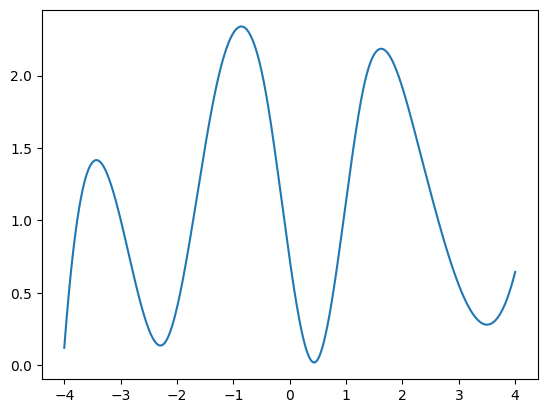

In [47]:
#GROUD TRUTH
x_doms = np.linspace(-4,4, 1000)
y_doms = function_test(x_doms)

#y_doms=1/(1+np.exp(-x_doms))

plt.plot(x_doms, y_doms)

In [48]:
import torch
import torch.nn as nn

class Custom_fun(nn.Module):
    def __init__(self, input_function):
        super().__init__()
        self.input_function = input_function

    # def forward(self, x):
    #     return self.input_function(x)
    
    def forward(self, x):
     return self.input_function(x)


In [49]:
activation = Custom_fun(function_test)

X = torch.linspace(-4, 4, 1000)
y = activation(X)


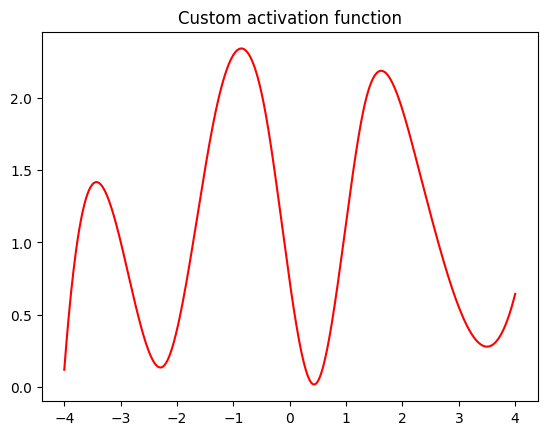

In [50]:
# plot the softplus function graph
plt.plot(X, y,color='red')
plt.title('Custom activation function')
plt.show()

# Training a Neural Network with Custom Activation Functions using PyTorch : 

Steps:
Import the necessary libraries
Define the custom activation function
Define the PyTorch neural network model
Load and prepare the MNIST dataset
Initialize the model and define the loss function and optimizer.
Train the model and plot the loss vs iterations curve.

In [29]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import matplotlib.pyplot as plt

In [30]:
class Custom_fun(nn.Module):
    def __init__(self, input_function):
        super().__init__()
        self.input_function = input_function

    def forward(self, x):
        x = x.detach().numpy()
        x = 1/(1+np.exp(-x))#self.input_function(x)
        return torch.tensor(x, dtype=torch.float32)

In [31]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, function):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = Custom_fun(function)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [32]:
model = MLP(100,10,1,function_test)

In [33]:
print(model)

MLP(
  (fc1): Linear(in_features=100, out_features=10, bias=True)
  (activation): Custom_fun()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [34]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [35]:
X=torch.randn(10,100)
Y=torch.randn(10,1)

dataset = MyDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True) 

In [36]:
criterion=nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [37]:
loss_values=[]
for epoch in range(500):
    running_loss = 0.0
    for x,y in dataloader:
        optimizer.zero_grad()
        output=model(x)
        loss=criterion(output,y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loss_values.append(running_loss)
        print('Epoch %d loss: %.3f' % (epoch + 1, running_loss))

Epoch 1 loss: 0.399
Epoch 1 loss: 0.399
Epoch 1 loss: 0.481
Epoch 1 loss: 1.485
Epoch 1 loss: 2.356
Epoch 1 loss: 2.964
Epoch 1 loss: 3.169
Epoch 1 loss: 3.173
Epoch 1 loss: 3.464
Epoch 1 loss: 3.729
Epoch 2 loss: 0.290
Epoch 2 loss: 1.282
Epoch 2 loss: 1.361
Epoch 2 loss: 2.244
Epoch 2 loss: 2.245
Epoch 2 loss: 2.642
Epoch 2 loss: 3.239
Epoch 2 loss: 3.510
Epoch 2 loss: 3.516
Epoch 2 loss: 3.727
Epoch 3 loss: 0.271
Epoch 3 loss: 1.155
Epoch 3 loss: 1.549
Epoch 3 loss: 2.153
Epoch 3 loss: 2.157
Epoch 3 loss: 2.238
Epoch 3 loss: 2.441
Epoch 3 loss: 2.735
Epoch 3 loss: 3.738
Epoch 3 loss: 3.738
Epoch 4 loss: 0.262
Epoch 4 loss: 0.465
Epoch 4 loss: 0.851
Epoch 4 loss: 0.855
Epoch 4 loss: 1.150
Epoch 4 loss: 1.762
Epoch 4 loss: 2.628
Epoch 4 loss: 2.710
Epoch 4 loss: 2.710
Epoch 4 loss: 3.717
Epoch 5 loss: 1.004
Epoch 5 loss: 1.004
Epoch 5 loss: 1.209
Epoch 5 loss: 1.498
Epoch 5 loss: 1.503
Epoch 5 loss: 2.383
Epoch 5 loss: 2.650
Epoch 5 loss: 3.251
Epoch 5 loss: 3.329
Epoch 5 loss: 3.723


In [38]:
print(loss)


tensor(0.0096, grad_fn=<MseLossBackward0>)


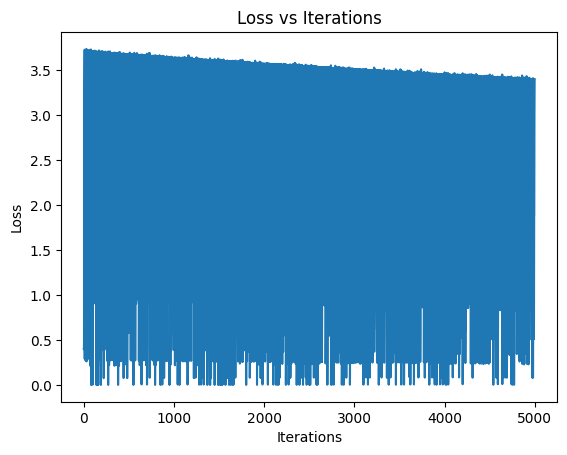

In [39]:
plt.plot(loss_values)
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [40]:
print("Parametri del new_model:")
for name, param in model.named_parameters():
    print(f"Nome del parametro: {name}")
    print(f"Valore del parametro: {param.data}")
    print(f"Gradiente del parametro: {param.grad}\n")

Parametri del new_model:
Nome del parametro: fc1.weight
Valore del parametro: tensor([[-0.0239, -0.0660,  0.0316, -0.0287, -0.0058,  0.0866, -0.0985,  0.0740,
         -0.0748, -0.0714, -0.0107, -0.0131,  0.0028, -0.0087, -0.0264,  0.0070,
          0.0848,  0.0678,  0.0373, -0.0069,  0.0979, -0.0702,  0.0597, -0.0435,
          0.0187,  0.0590, -0.0981, -0.0229,  0.0613, -0.0408, -0.0319,  0.0283,
          0.0549,  0.0569, -0.0883, -0.0754, -0.0445, -0.0291, -0.0438,  0.0362,
          0.0994,  0.0183, -0.0998, -0.0224, -0.0261, -0.0929,  0.0904,  0.0264,
          0.0620, -0.0422, -0.0336, -0.0762, -0.0723,  0.0985, -0.0705,  0.0528,
         -0.0953, -0.0223,  0.0631,  0.0993, -0.0812,  0.0688,  0.0978, -0.0789,
         -0.0149,  0.0211, -0.0945,  0.0514, -0.0341, -0.0696,  0.0980, -0.0343,
         -0.0617,  0.0140,  0.0966,  0.0993,  0.0003, -0.0176, -0.0286, -0.0864,
          0.0233,  0.0167, -0.0707,  0.0615,  0.0617, -0.0290,  0.0747,  0.0671,
         -0.0125, -0.0506,  0.0